In [6]:
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE

%matplotlib notebook

from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

In [2]:
# paths to the databases files

paths = [
    "./isomap_o_dim5.csv",
    "./pivot_o.csv"
]

In [3]:
# read the csv table with the isomap projection, pca is not recommended because of the computational cost

dataset = np.genfromtxt(paths[0], delimiter=';')

In [13]:
# the pivot table (to take the masks for coloring databases)

color_info = pd.read_csv(paths[1], delimiter = ';', low_memory=False)

In [55]:
color_info

,Unnamed: 0,color,o__,o__Acidimicrobiales,o__Acidobacteriales,o__Actinomycetales,o__Aeromonadales,o__Alteromonadales,o__Anaeroplasmatales,o__Aquificales,...,o__SBla14,o__Sphaerochaetales,o__Spirobacillales,o__Sva0725,o__Thermoanaerobacterales,o__Thermogemmatisporales,o__Thiohalorhabdales,o__YLA114,o__Z20,o__mle1-48
0,10317.000052344,AGP,0.0,0.0,0.0,0.001334,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10317.000052366,AGP,0.0,0.0,0.0,0.007542,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10317.000052369,AGP,0.0,0.0,0.0,0.000838,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10317.00005237,AGP,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10317.000052372,AGP,0.0,0.0,0.0,0.000693,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14093,MSM5LLIO,IBD,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14094,MSM5LLIQ,IBD,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14095,MSM5ZOJY,IBD,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14096,MSM633FF,IBD,0.0,0.0,0.0,0.000930,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# insert column for colors

color_info.insert(1, "color", True)

In [74]:
# copy the names to that column

color_info["color"] = color_info["Unnamed: 0"]

In [75]:
# function to convert names to colors. Suffix information is enough. Each database has specific color

def check(name) :
    if (name.startswith("103")) :
        return 'b'
    elif (name.startswith("EP")) :
        return 'r'
    elif (name.startswith("HMP2_") or (name.startswith("otu"))) :
        return 'g'
    else :
        return 'y'

In [73]:
# apply coloring to the full dataset

color_info["color"] = color_info["color"].apply(check)

In [69]:
# Check that the databases are marked properly

color_info["color"].value_counts()

k    9511
r    3457
g    1044
y      86
Name: color, dtype: int64

# Repeat the code below as many times as the number of plots you need
# Don't forget to store the data and to rename files for each embedding
# 3D graphs could be zoomed and rotated

In [129]:
# insert the desired parameters and after the end of computation add them to the following picture
# for alternative parameters refer to the t-SNE guide, i.e. from the report
# to recalculate the existing pictures, copy the string of parameters from the following plot

tsne = TSNE(n_components=2, init='pca', verbose=1,angle=0.3, n_jobs=-1, perplexity=50, n_iter=10000)

In [130]:
tsne.fit_transform(dataset)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 14098 samples in 0.012s...
[t-SNE] Computed neighbors for 14098 samples in 0.695s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14098
[t-SNE] Computed conditional probabilities for sample 2000 / 14098
[t-SNE] Computed conditional probabilities for sample 3000 / 14098
[t-SNE] Computed conditional probabilities for sample 4000 / 14098
[t-SNE] Computed conditional probabilities for sample 5000 / 14098
[t-SNE] Computed conditional probabilities for sample 6000 / 14098
[t-SNE] Computed conditional probabilities for sample 7000 / 14098
[t-SNE] Computed conditional probabilities for sample 8000 / 14098
[t-SNE] Computed conditional probabilities for sample 9000 / 14098
[t-SNE] Computed conditional probabilities for sample 10000 / 14098
[t-SNE] Computed conditional probabilities for sample 11000 / 14098
[t-SNE] Computed conditional probabilities for sample 12000 / 14098
[t-SNE] Computed conditional probabilities for sa

array([[  18.700037,  123.05294 ],
       [-109.37128 ,  -27.33716 ],
       [ -50.88306 , -109.91969 ],
       ...,
       [  58.726185, -101.79971 ],
       [  26.5056  ,   88.54179 ],
       [ -68.27319 ,  -63.931187]], dtype=float32)

In [131]:
tsne.embedding_.shape

(14098, 2)

In [132]:
# copy and paste the value to the following picture

tsne.kl_divergence_

0.9362791776657104

In [133]:
tsne.embedding_

array([[  18.700037,  123.05294 ],
       [-109.37128 ,  -27.33716 ],
       [ -50.88306 , -109.91969 ],
       ...,
       [  58.726185, -101.79971 ],
       [  26.5056  ,   88.54179 ],
       [ -68.27319 ,  -63.931187]], dtype=float32)

In [134]:
# store the embedding to the csv table. Rename the file each time a new embedding is generated

np.savetxt("tsne_o_dim2_p50.csv", tsne.embedding_, delimiter=";")

<IPython.core.display.Javascript object>


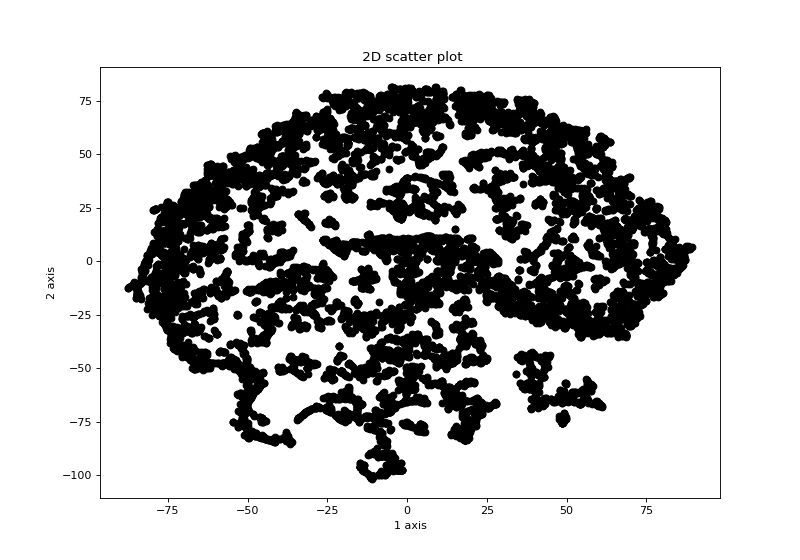

In [36]:
# parameters are: n_components=2, init='random', n_iter=1000
# KL divergence = 1.1333867311477661

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = "black")
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


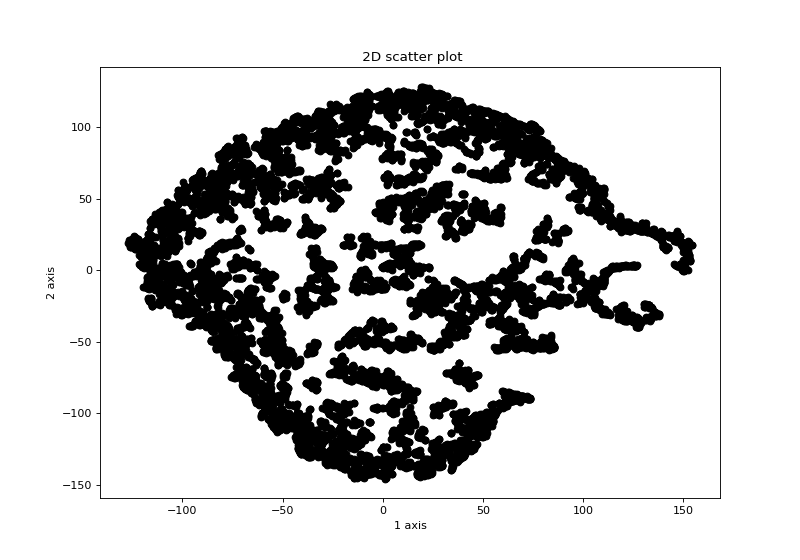

In [30]:
#parameters are: n_components=2, init='pca', n_iter=5000
# KL divergence = 1.0124903917312622

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = "black")
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


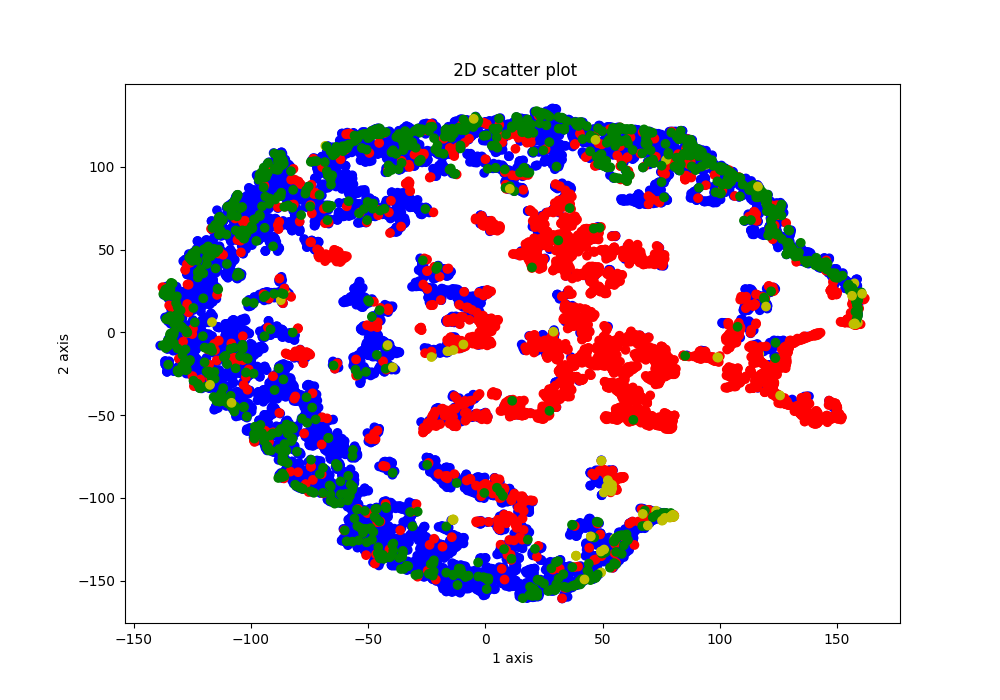

In [128]:
# parameters are: n_components=2, init='pca', verbose=1,angle=0.3, n_jobs=-1, perplexity=40, n_iter=5000
# KL divergence = 0.9632964134216309

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = color_info["color"])
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


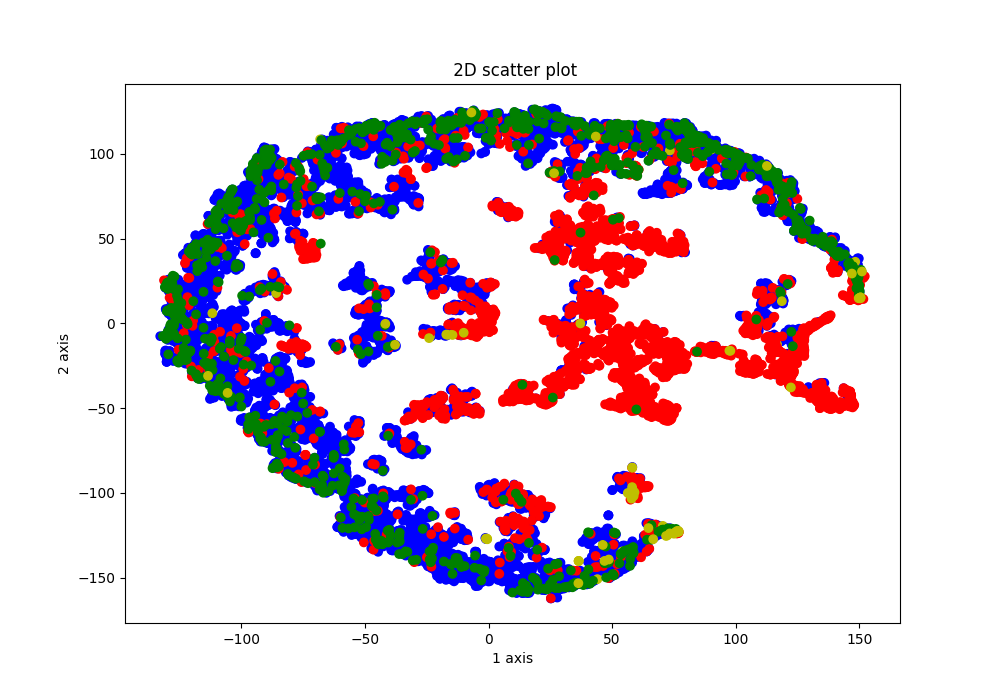

In [76]:
# parameters are: n_components=2, init='pca', verbose=1,angle=0.3, n_jobs=-1, perplexity=50, n_iter=10000
# KL divergence = 9362791776657104

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = color_info["color"])
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


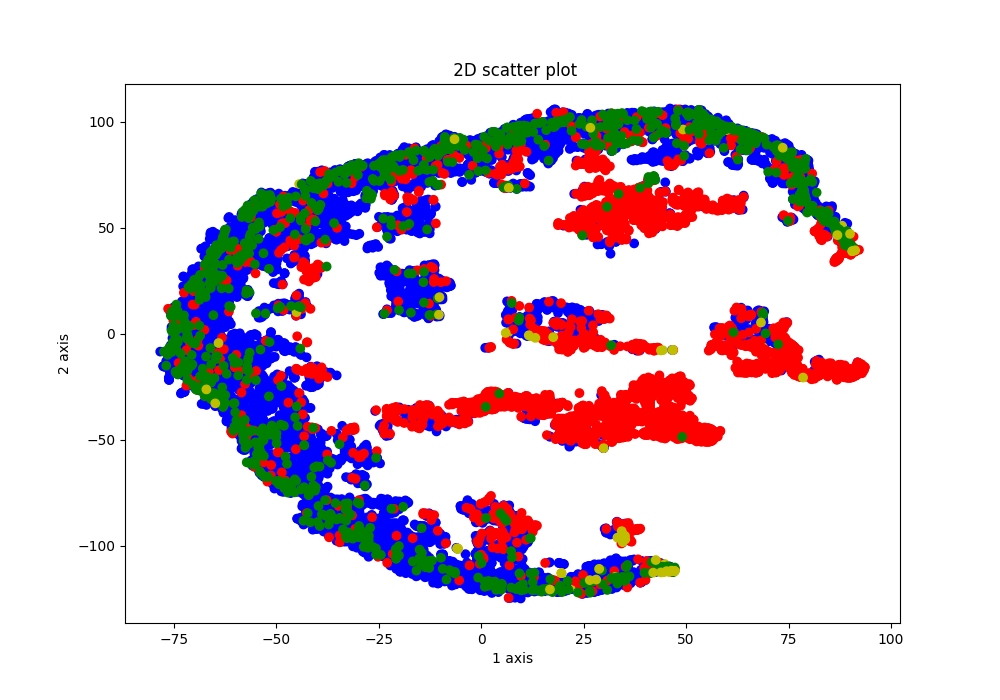

In [92]:
# parameters are: n_components=2, init='pca', verbose=1,angle=0.25, n_jobs=-1, perplexity=100, n_iter=10000
# KL divergence = 0.84440016746521

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = color_info["color"])
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


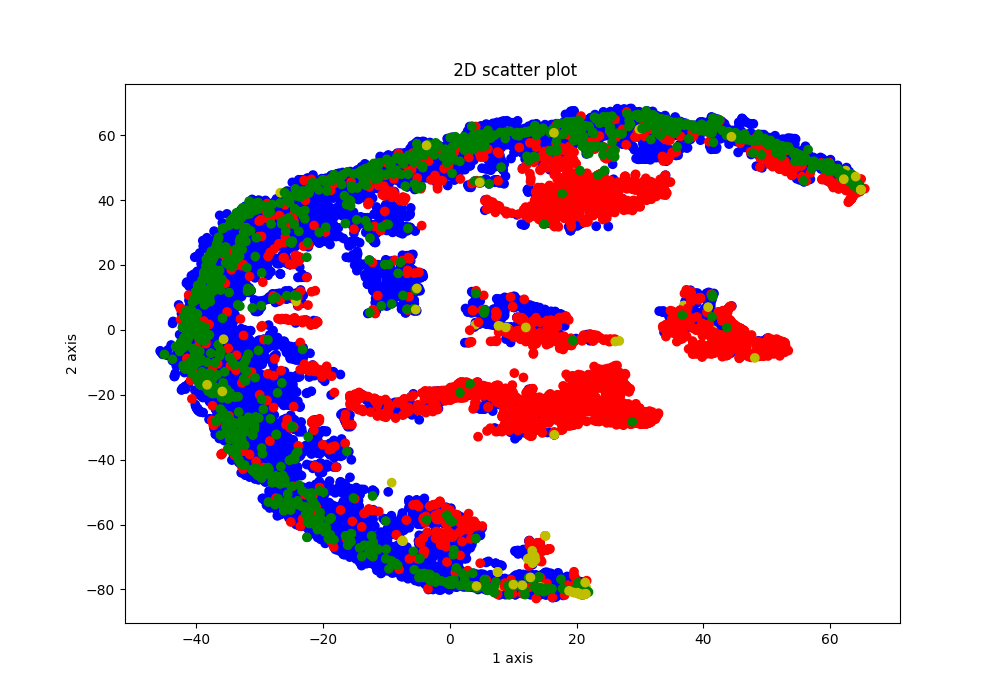

In [81]:
# parameters are: n_components=2, init='pca', verbose=1,angle=0.25, n_jobs=-1, perplexity=200, n_iter=10000
# KL divergence = 0.7180387377738953

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = color_info["color"])
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


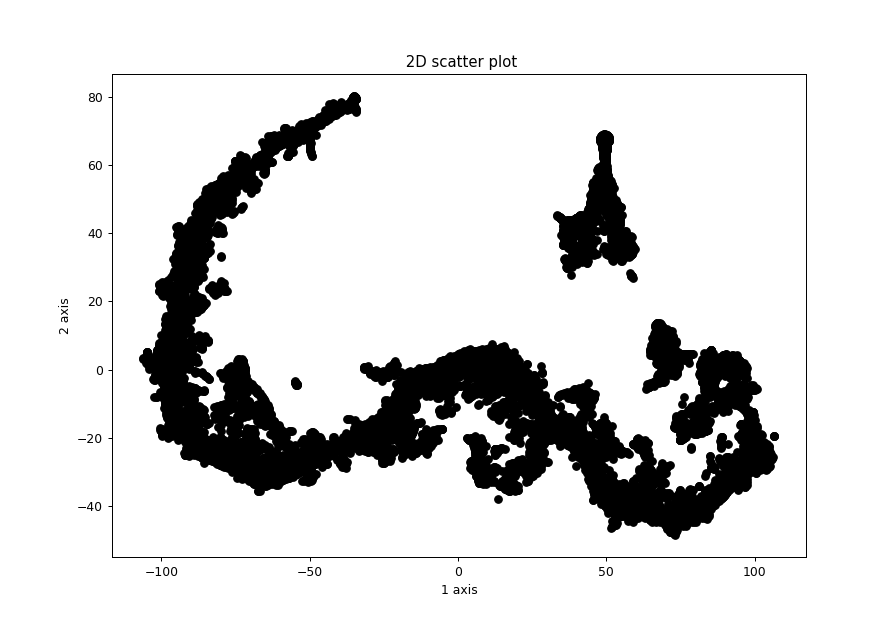

In [44]:
# parameters are: n_components=2, init='pca', verbose=1,angle=0.3, n_jobs=-1, perplexity=150, n_iter=10000
# KL divergence = 

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = "black")
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


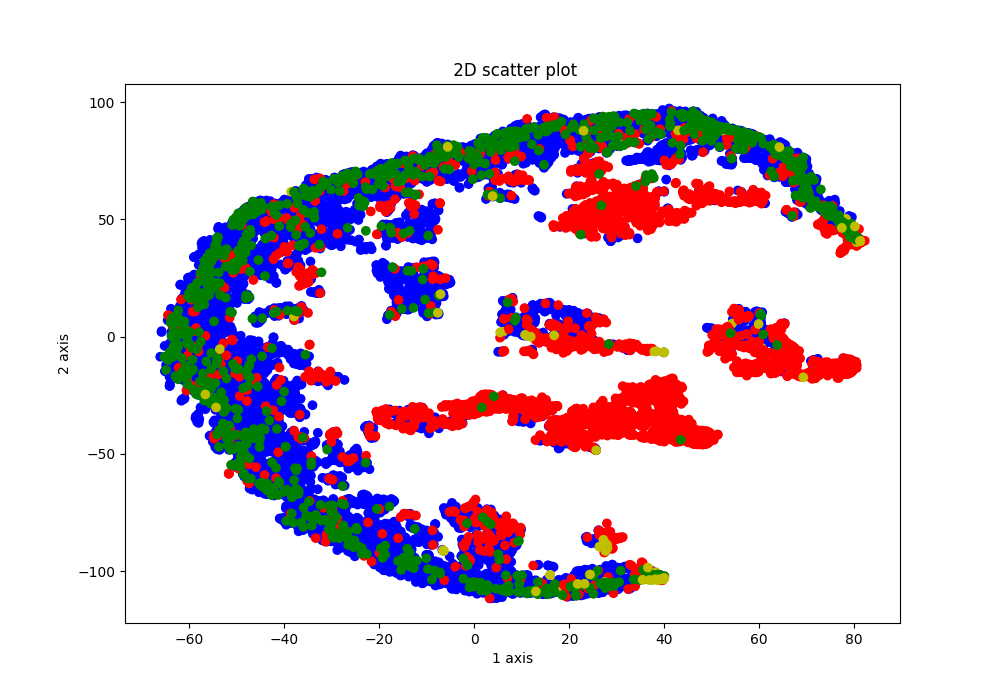

In [121]:
# parameters are: n_components=2, init='pca', verbose=1, angle=0.25, n_jobs=-1, perplexity=120, n_iter=10000
# KL divergence = 0.8135182857513428

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = color_info["color"])
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


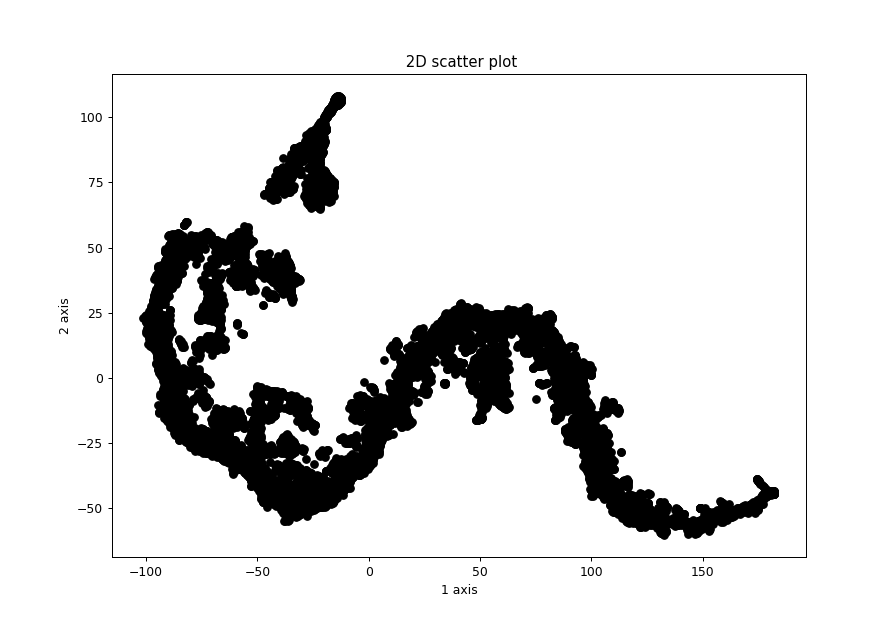

In [54]:
# parameters are: n_components=2, init='random', verbose=1,angle=0.3, n_jobs=-1, perplexity=120, n_iter=12000
# KL divergence = 0.6779316663742065

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = "black")
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


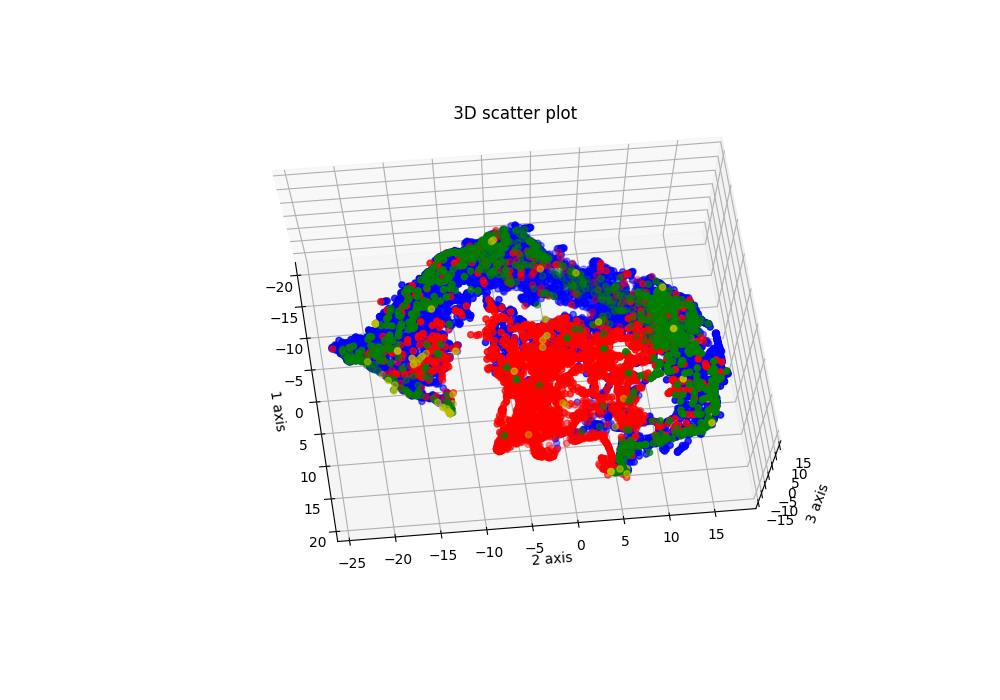

In [100]:
# parameters are: n_components=3, init='pca', verbose=1,angle=0.3, n_jobs=-1, perplexity=120, n_iter=10000
# KL divergence = 0.6873254776000977

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(tsne.embedding_[:, 0], tsne.embedding_[:, 1], tsne.embedding_[:, 2], color = color_info["color"])
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
ax.set_zlabel('3 axis')
plt.show()

<IPython.core.display.Javascript object>


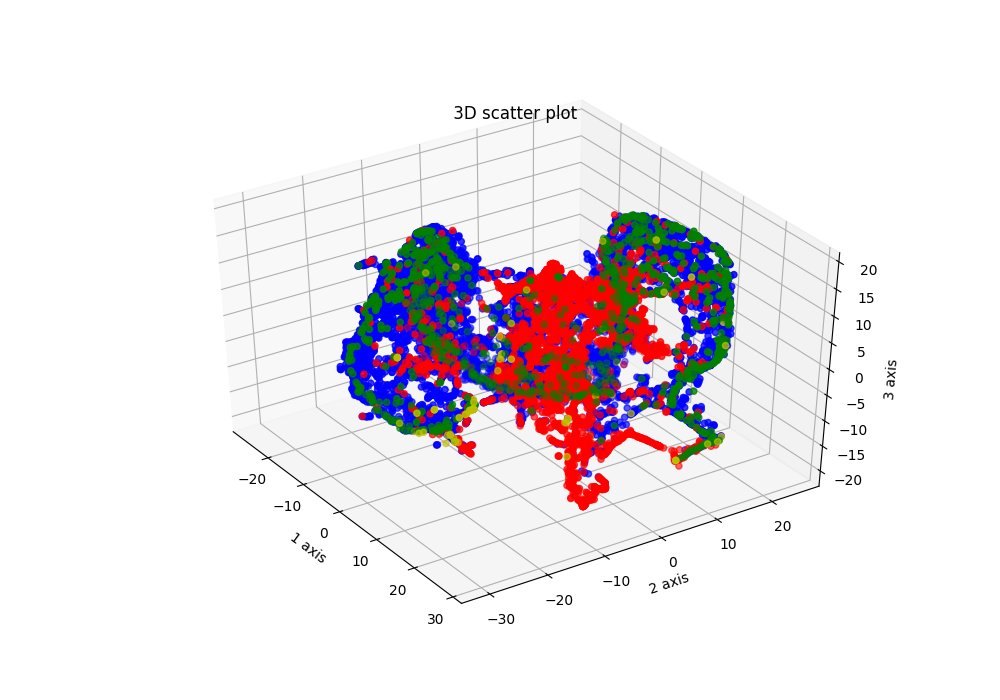

In [107]:
# parameters are: n_components=3, init='pca', verbose=1,angle=0.5, n_jobs=-1, perplexity=50, n_iter=10000
# KL divergence = 0.8246116042137146

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(tsne.embedding_[:, 0], tsne.embedding_[:, 1], tsne.embedding_[:, 2], color = color_info["color"])
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
ax.set_zlabel('3 axis')
plt.show()

<IPython.core.display.Javascript object>


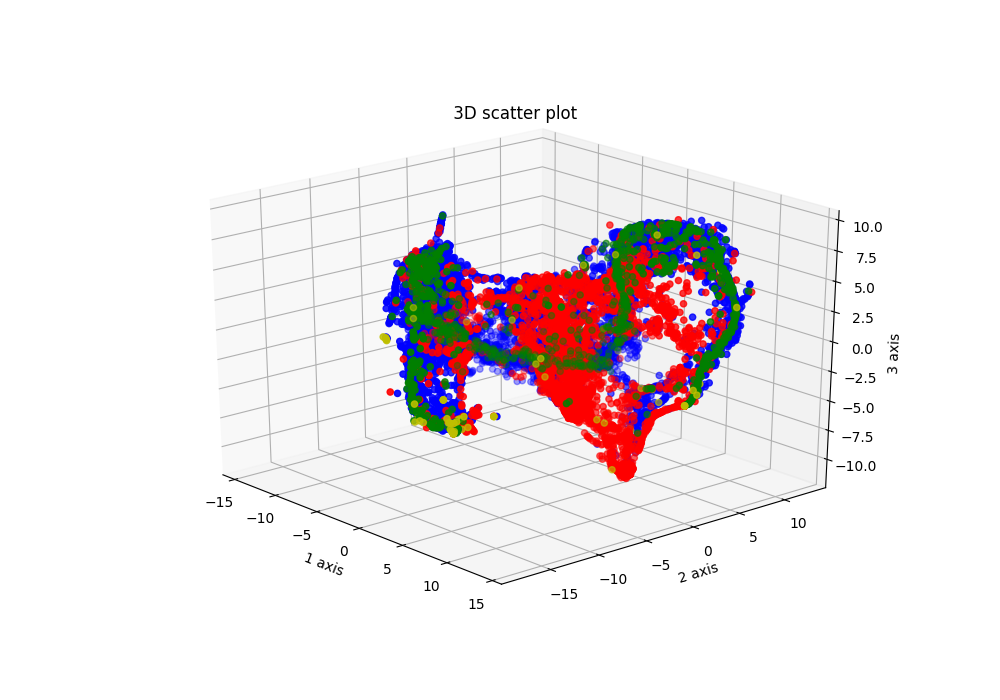

In [114]:
# parameters are: n_components=3, init='pca', verbose=1,angle=0.25, n_jobs=-1, perplexity=300, n_iter=10000
# KL divergence = 0.5115651488304138

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(tsne.embedding_[:, 0], tsne.embedding_[:, 1], tsne.embedding_[:, 2], color = color_info["color"])
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
ax.set_zlabel('3 axis')
plt.show()